# Data Visualization Abstractions

`matplotlib` is a very powerful data visualization package, but tends to be quite verbose, often requiring a lot of repetitious "boilerplate" to achieve a pleasing result.

These functions and classes illustrate "best practices" and provide examples and "short-cuts" for common use-cases.

In [27]:
# matplotlib "magic" renders plots "inline" in the notebook.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

## Decorated Axes
  - set the plot title, axes labels, and other options for an axes
  - show a legend if there is more than one data series in the plot
  - see [subplot API docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) 
  - see [Axes API docs](https://matplotlib.org/stable/api/axes_api.html)

In [28]:
def legend(axes=None, **options):
    """Draws a legend only if there is at least one labeled data series.

    :param axes: the axes to add the legend to, or None to use the `plt.gca()` (current axes)
    :param options: keyword arguments passed directly to `plt.legend()`
           see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
    """
    options = { **dict(loc="best", frameon=False), **options}

    ax = axes or plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels, **options)

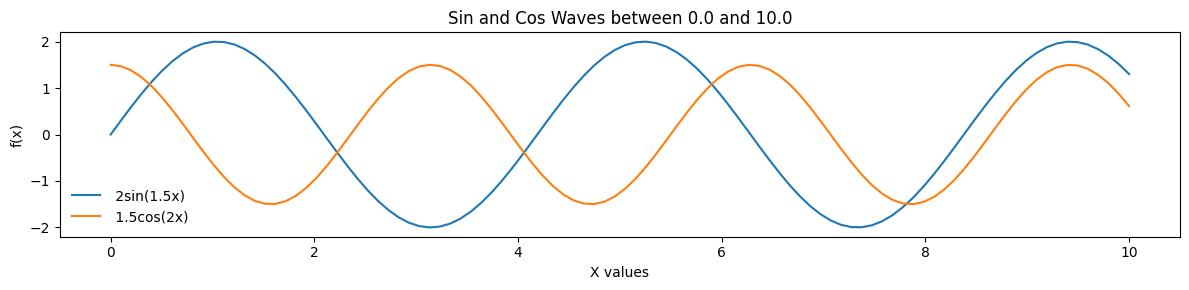

In [29]:
# Sample "best practices" for 2D line plot with decorated axes and a legend

x = np.linspace(0, 10, 100)
sin_x = 2 * np.sin(1.5 * x)
cos_x = 1.5 * np.cos(2 * x)

_, ax = plt.subplots(figsize=(12, 3), layout='tight')  # `figsize` specifies the aspect ratio (width x height) for figure.
ax.set(
    title=f'Sin and Cos Waves between {x[0]} and {x[-1]}',
    xlabel='X values',
    ylabel='f(x)',
)
ax.plot(x, sin_x, label=' 2sin(1.5x)')
ax.plot(x, cos_x, label=' 1.5cos(2x)')
legend(axes=ax)
plt.show()

## Multiple Axes
  - layout plots in a line or grid to provide side-by-side comparisons
  - see [subplots API docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) 

In [30]:
def axes_layout(nrows=1, ncols=1, fig_title=None, **kwargs):
    """ layout nrows x ncols axes with sensible defaults.  kwargs passed directly to `plt.subplots()`"""
    kwargs = {**dict(layout='tight'), **kwargs}
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, **kwargs)
    if fig_title:
        fig.suptitle(fig_title)
    return axes

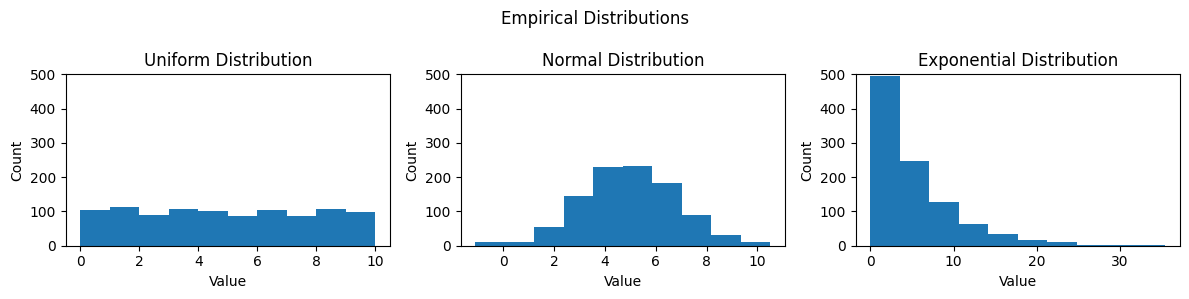

In [31]:
# Sample "best practices" for multiple axes layout

n  = 1000
uniform = np.random.random(n) * 10
normal = np.random.normal(5, 2, n)
exponential = np.random.exponential(5, n)

axes_data = [
    dict(title='Uniform Distribution', data=uniform),
    dict(title='Normal Distribution', data=normal),
    dict(title='Exponential Distribution', data=exponential),
]

# 1 row x 3 column "grid" of axes
ax = axes_layout(1, 3, figsize=(12, 3), fig_title='Empirical Distributions')
for ax, options in zip(ax, axes_data):
    ax.set(title=options['title'],  xlabel='Value', ylabel='Count', ylim=(0,n/2)),
    ax.hist(options['data'], bins=10)
plt.show()

## 2D array as image using `imshow()`
  - an "image" is just a 2D array of colour values
  - thus *any* 2D array (aka "matrix") can be displayed as an image
  - a "colour map" (`cmap`) provides a mapping from the array values to colour values displayed in the image
  - see [`imshow` API docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html)
  - [built-in colour maps](https://matplotlib.org/stable/users/explain/colors/colormaps.html#sequential)

In [32]:
def plot_matrix_2d(array, axes=None, title='', cmap='viridis', **options):
    """ 
    Plot the 2D array as an image on the given axes  1's will be dark blue, 0's will be light blue. 

    :param axes: the axes to plot on, or None to use the `plt.gca()` (current axes)
    :param options: keyword arguments passed directly to `plt.imshow()`
           see https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html
    """
    axes = axes or plt.gca()  # If not axes are provided, draw on current axes
    axes.set_title(title)
    # Turn off axes labels and tick marks
    axes.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False , 
                     labelbottom=False, labeltop=False, labelleft=False, labelright=False,) 
    # Defaults for displaying a "matrix" with hard-pixel boundaries and (0,0) at top-left
    options = {**dict(interpolation='nearest', origin='upper'), **options}
    axes.imshow(array, cmap=cmap, **options)

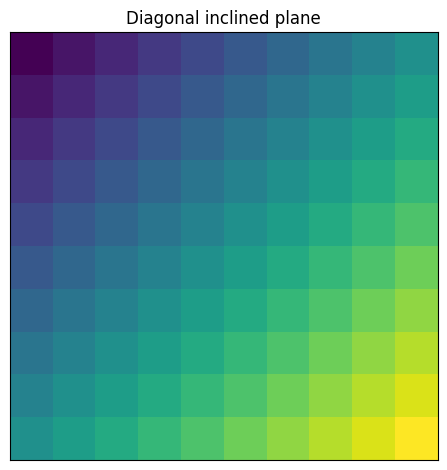

In [33]:
# Sample "best practices" for displaying a 2D array

# x and y are 10x10 matrices; each row in x ranges from 0 - 10, each column in y ranges from 0 - 10
r = range(0, 10)
x, y = np.meshgrid(r, r)
z = x+y   # z is also a 10x10 matrix with z[r,c] = x[r,c] + y[r,c] for each row, column.

ax = axes_layout()
plot_matrix_2d(z, axes=ax, title='Diagonal inclined plane', cmap='viridis')  # try some different colour maps!
plt.show()